In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

eth2012 = pd.read_csv('ObesityEthnicity2012.csv')
eth2013 = pd.read_csv('ObesityEthnicity2013.csv')
eth2014 = pd.read_csv('ObesityEthnicity2014.csv')
eth2015 = pd.read_csv('ObesityEthnicity2015.csv')
eth2016 = pd.read_csv('ObesityEthnicity2016.csv')

eth2012['Year'] = '2012'
eth2013['Year'] = '2013'
eth2014['Year'] = '2014'
eth2015['Year'] = '2015'
eth2016['Year'] = '2016'

allorig_df = pd.concat([eth2012, eth2013, eth2014, eth2015, eth2016], ignore_index=True)

eth2016.head()

,State,Date,BMI Category,BMI Over 25,Race/Ethnicity (General),Five Level Race/ethnicity,Year
0,AL,1072016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016
1,AL,1112016,Overweight,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
2,AL,1062016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016
3,AL,1082016,Overweight,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
4,AL,1052016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016


In [2]:
#obese only 2012
obese2012 = eth2012[eth2012['BMI Category'].str.contains("Obese") == True]
obese2012['BMI Category'] = obese2012['BMI Category'].replace({"Obese":1})
#obese only 2013
obese2013 = eth2013[eth2013['BMI Category'].str.contains("Obese") == True]
obese2013['BMI Category'] = obese2013['BMI Category'].replace({"Obese":1})
#obese only 2014
obese2014 = eth2014[eth2014['BMI Category'].str.contains("Obese") == True]
obese2014['BMI Category'] = obese2014['BMI Category'].replace({"Obese":1})
#obese only 2015
obese2015 = eth2015[eth2015['BMI Category'].str.contains("Obese") == True]
obese2015['BMI Category'] = obese2015['BMI Category'].replace({"Obese":1})
#obese only 2016
obese2016 = eth2016[eth2016['BMI Category'].str.contains("Obese") == True]
obese2016['BMI Category'] = obese2016['BMI Category'].replace({"Obese":1})

obese2016.head()

,State,Date,BMI Category,BMI Over 25,Race/Ethnicity (General),Five Level Race/ethnicity,Year
7,AL,1072016,1,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
8,AL,1072016,1,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
9,AL,1282016,1,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
13,AL,1082016,1,Yes,American Indian/Alaskan Native,"Other race only, Non-Hispanic",2016
19,AL,2052016,1,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016


In [3]:
#how many white people are there in total for 2012
total = eth2012.loc[eth2012['Race/Ethnicity (General)'] == "White, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count()
#how many white people are obese in 2012
obeseonly = obese2012.loc[obese2012['Race/Ethnicity (General)'] == "White, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count()
#calculate the percentage, should calculate to 25.664845
perctest = (obeseonly * 100) / total
print(perctest)

Year
2012    25.664845
Name: Race/Ethnicity (General), dtype: float64


In [4]:
#put all frames together
allyears_df = pd.concat([obese2012, obese2013, obese2014, obese2015, obese2016], ignore_index=True)
del allyears_df['Five Level Race/ethnicity']
del allyears_df['_RACEGR3']
allyears_df = allyears_df[['State', 'Date', 'BMI Category', 'BMI Over 25', 'Race/Ethnicity (General)', 'Year']]
allyears_df.head()

,State,Date,BMI Category,BMI Over 25,Race/Ethnicity (General),Year
0,AL,1032012,1,Yes,"Black, Non-Hispanic",2012
1,AL,1062012,1,Yes,"White, Non-Hispanic",2012
2,AL,1232012,1,Yes,"White, Non-Hispanic",2012
3,AL,2132012,1,Yes,"White, Non-Hispanic",2012
4,AL,2142012,1,Yes,"White, Non-Hispanic",2012


In [5]:
allyears_df['Race/Ethnicity (General)'].value_counts()
# whitecount = allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "White, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count()
# myCount = whitecount.groupby('Year').count()
# groupyears = allyears_df.groupby('Year')
# myCount = allyears_df['Race/Ethnicity (General)'].str.count("White, Non-Hispanic").sum()
# # # myCount
# myCount = groupyears.loc[groupyears['Race/Ethnicity (General)'] == "White, Non-Hispanic"].count()
# whitecount


White, Non-Hispanic                 474168
Black, Non-Hispanic                  69322
Hispanic                             51947
Multiracial, Non-Hispanic            13810
American Indian/Alaskan Native       12715
Don't Know/Not Sure/Refused           8373
Asian                                 4763
Other Race, Non-Hispanic              2984
Native Hawaiian/Pacific Islander      2753
Name: Race/Ethnicity (General), dtype: int64

In [6]:
#create dataframe with Year and counts of each ethnic group
ethnic_by_year = pd.DataFrame({"Year": allyears_df['Year'].unique(),
                              "White (Non-Hispanic)": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "White, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count(),
                              "Black (Non-Hispanic)": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Black, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Hispanic": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Multiracial, Non-Hispanic": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Multiracial, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Native American/Alaskan": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "American Indian/Alaskan Native"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Not Sure/Refused": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Don't Know/Not Sure/Refused"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Asian": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Asian"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Hawaiian/Pacific Islander": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Native Hawaiian/Pacific Islander"].groupby('Year')['Race/Ethnicity (General)'].count(),
                               "Other Race, Non-Hispanic": allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == "Other Race, Non-Hispanic"].groupby('Year')['Race/Ethnicity (General)'].count()
                              })

ethnic_by_year = ethnic_by_year[["Year", "White (Non-Hispanic)", "Black (Non-Hispanic)", "Hispanic", "Multiracial, Non-Hispanic", "Native American/Alaskan", "Not Sure/Refused", "Asian", "Hawaiian/Pacific Islander", "Other Race, Non-Hispanic"]]

ethnic_by_year.head()

,Year,White (Non-Hispanic),Black (Non-Hispanic),Hispanic,"Multiracial, Non-Hispanic",Native American/Alaskan,Not Sure/Refused,Asian,Hawaiian/Pacific Islander,"Other Race, Non-Hispanic"
Year,,,,,,,,,,
2012,2012,92772,15221,9917,2792,2441,1357,889,579,814
2013,2013,98536,14649,10624,2813,2831,1976,928,550,661
2014,2014,94607,12848,10176,2687,2623,1717,905,596,494
2015,2015,88408,12246,10177,2480,2274,1498,967,507,457
2016,2016,99845,14358,11053,3038,2546,1825,1074,521,558


In [7]:
#just do one for now
x_val = ethnic_by_year['Year']
y_val = ethnic_by_year['White (Non-Hispanic)']

# plt.plot(x_val, y_val, '-o', color='red')
# plt.plot(x_val, ethnic_by_year['Black (Non-Hispanic)'], '-o', color='black')
# plt.plot(x_val, ethnic_by_year['Hispanic'], '-o', color='yellow')
# plt.plot(x_val, ethnic_by_year['Asian'], '-o', color='blue')
# plt.legend(loc="best")

In [8]:
#return percentages for all years based on the White, Non-Hispanic column
def obesepercent(racename):
    race = racename

    total_of_group = allorig_df.loc[allorig_df['Race/Ethnicity (General)'] == race].groupby('Year')['Race/Ethnicity (General)'].count()
    amount_of_obese = allyears_df.loc[allyears_df['Race/Ethnicity (General)'] == race].groupby('Year')['Race/Ethnicity (General)'].count()
                                                                                                
    percentages = (amount_of_obese * 100) / total_of_group
                                                                                                    
    return percentages

In [9]:
obesepercent("White, Non-Hispanic")

Year
2012    25.664845
2013    26.329628
2014    26.642279
2015    26.438590
2016    27.222040
Name: Race/Ethnicity (General), dtype: float64

In [23]:
#returns the value for race and a specific year
def obeseyear(racename, ethyear, obeseyear):
    race = racename
    
    total_of_group = ethyear.loc[ethyear['Race/Ethnicity (General)'] == race].groupby('Year')['Race/Ethnicity (General)'].count()
    amount_of_obese = obeseyear.loc[obeseyear['Race/Ethnicity (General)'] == race].groupby('Year')['Race/Ethnicity (General)'].count()
                                                                                                
    percentages = (amount_of_obese * 100) / total_of_group
    
    return percentages

In [24]:
obeseyear("White, Non-Hispanic", eth2012, obese2012)

Year
2012    25.664845
Name: Race/Ethnicity (General), dtype: float64

In [10]:
ethnic_by_year2 = pd.DataFrame({"Year": allyears_df['Year'].unique(), 
                                "White (Non-Hispanic)": obesepercent("White, Non-Hispanic"), 
                                "Black (Non-Hispanic)": obesepercent("Black, Non-Hispanic"), 
                                "Hispanic": obesepercent("Hispanic"), 
                                "Multiracial, Non-Hispanic": obesepercent("Multiracial, Non-Hispanic"), 
                                "Native American/Alaskan": obesepercent("American Indian/Alaskan Native"), 
                                "Not Sure/Refused": obesepercent("Don't Know/Not Sure/Refused"), 
                                "Asian": obesepercent("Asian"), 
                                "Hawaiian/Pacific Islander": obesepercent("Native Hawaiian/Pacific Islander"), 
                                "Other Race, Non-Hispanic": obesepercent("Other Race, Non-Hispanic")})

ethnic_by_year2 = ethnic_by_year2[["Year", "White (Non-Hispanic)", "Black (Non-Hispanic)", "Hispanic", "Multiracial, Non-Hispanic", "Native American/Alaskan", "Not Sure/Refused", "Asian", "Hawaiian/Pacific Islander", "Other Race, Non-Hispanic"]]

ethnic_by_year2.head()

,Year,White (Non-Hispanic),Black (Non-Hispanic),Hispanic,"Multiracial, Non-Hispanic",Native American/Alaskan,Not Sure/Refused,Asian,Hawaiian/Pacific Islander,"Other Race, Non-Hispanic"
Year,,,,,,,,,,
2012,2012,25.664845,39.670046,27.756941,30.857648,35.500291,22.330097,9.578709,33.998826,25.453408
2013,2013,26.329628,39.624019,28.806941,31.069141,36.948577,23.493045,9.851380,35.760728,25.018925
2014,2014,26.642279,38.722122,28.512188,30.740190,37.200397,22.220784,9.801798,34.853801,23.945710
2015,2015,26.438590,37.702041,28.527779,30.693069,34.904068,20.417064,9.971128,36.240172,24.205508
2016,2016,27.222040,38.355506,28.291697,32.305402,35.253392,21.280317,10.306113,36.256089,26.458037


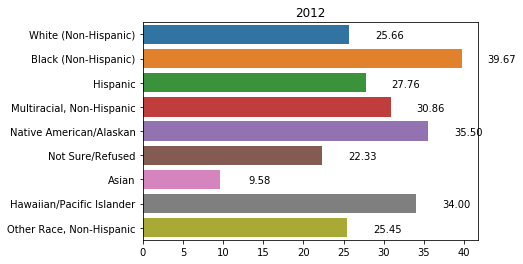

In [60]:
import seaborn as sns
#2012
# del ethnic_by_year2['Year']

yes = ethnic_by_year2.iloc[0, :].tolist()

myColumns = ethnic_by_year2.columns.tolist()

bar2012 = sns.barplot(x=yes, y=myColumns)
plt.title("2012")

for p in bar2012.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.show()

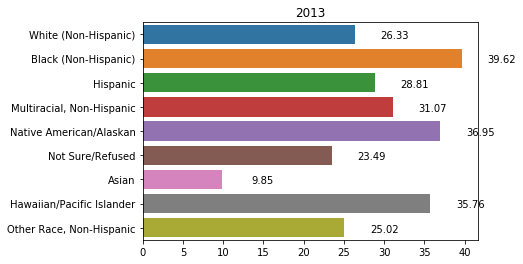

In [51]:
#2013
# del ethnic_by_year2['Year']

yes = ethnic_by_year2.iloc[1, :].tolist()

myColumns = ethnic_by_year2.columns.tolist()

bar2013 = sns.barplot(x=yes, y=myColumns)
plt.title("2013")

for p in bar2013.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.show()

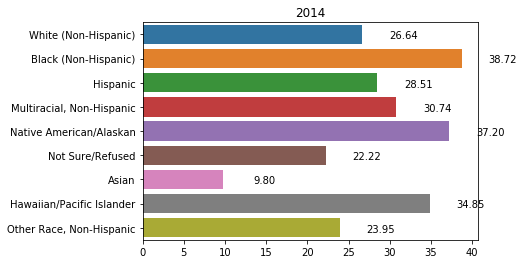

In [54]:
#2014
# del ethnic_by_year2['Year']

yes = ethnic_by_year2.iloc[2, :].tolist()

myColumns = ethnic_by_year2.columns.tolist()

bar2014 = sns.barplot(x=yes, y=myColumns)
plt.title("2014")

for p in bar2014.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.show()

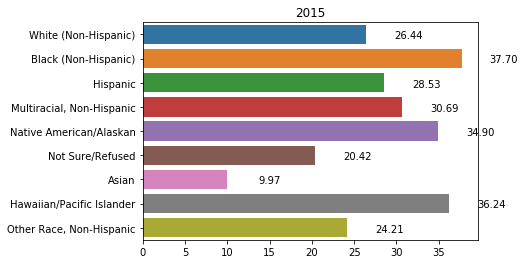

In [52]:
#2015
# del ethnic_by_year2['Year']

yes = ethnic_by_year2.iloc[3, :].tolist()

myColumns = ethnic_by_year2.columns.tolist()

bar2015 = sns.barplot(x=yes, y=myColumns)
plt.title("2015")

for p in bar2015.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.show()

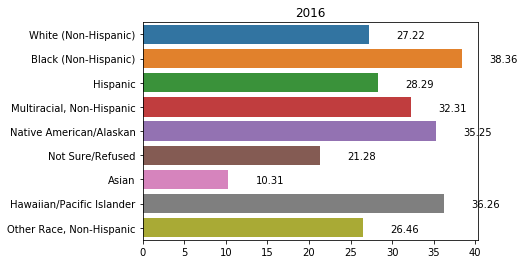

In [53]:
#2016
# del ethnic_by_year2['Year']

yes = ethnic_by_year2.iloc[4, :].tolist()

myColumns = ethnic_by_year2.columns.tolist()

bar2016 = sns.barplot(x=yes, y=myColumns)
plt.title("2016")

for p in bar2016.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.show()

In [ ]:
#all years in one column
#